## Results Analysis
#### Resumes (1.4GB)


### Goals




### Methodology




<a id="setup"></a>
## Setup

Let's import the serialized data



In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries
import re
import string
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
import unicodedata
from collections import Counter

# NLTK library for stop word removal
from nltk.corpus import stopwords

# SK-learn libraries for learning.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import log_loss

from xml.dom import minidom
from bs4 import BeautifulSoup as BS




<a id="eda"></a>
## Exploratory Analysis

### Certifications

In [2]:

# College degree

# CO:400, E:5, data, adam score: 0.7255089820359282
# CO:400, E:5, plain_data, adam score: 0.720558882235529
# CO:800, E:5, data, adam score: 0.7310978043912175
# CO:800, E:5, plain_data, adam score: 0.7325349301397206
# CO:800, E:10, data, adam score: 0.7156087824351297
# CO:800, E:10, plain_data, adam score: 0.7274650698602795
# CO:400, E:15, data, adam score: 0.6801596806387226
# CO:400, E:15, plain_data, adam score: 0.7110578842315369


# [{'accuracy': 0.740279,
#   'name': 'TFIDF HTML - Predict Bachelor',
#   'log_loss': 0.518788},
#  {'accuracy': 0.737525,
#   'name': 'TFIDF Plain Text - Predict Bachelor',
#   'log_loss': 0.521584},
#  {'accuracy': 0.676727,
#   'name': 'TFIDF HTML NB - Predict Bachelor',
#   'log_loss': 0.937732},
#  {'accuracy': 0.706547,
#   'name': 'TFIDF Plain NB - Predict Bachelor',
#   'log_loss': 0.760408},
#  {'accuracy': 0.706547,
#   'name': 'TFIDF Plain NB - Predict Bachelor',
#   'log_loss': 0.760408},
#  {'accuracy': 0.739122,
#   'name': 'TFIDF Plain Log Pipeline [*all] - Predict Bachelor',
#   'log_loss': 0.521534},
#  {'accuracy': 0.735649,
#   'name': 'TFIDF HTML Log Pipeline [*all] - Predict bachelor',
#   'log_loss': 0.527813},
#  {'F1 accuracy': 0.7197456279809221,
#   'name': 'LSTM: CO:400, E:5, data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7222558161738966,
#   'name': 'LSTM: CO:400, E:5, plain_data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7218212457473531,
#   'name': 'LSTM: CO:800, E:5, data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7220120186957489,
#   'name': 'LSTM: CO:800, E:5, plain_data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7214815286218856,
#   'name': 'LSTM: CO:800, E:10, data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7193378959095973,
#   'name': 'LSTM: CO:800, E:10, plain_data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7046242958530919,
#   'name': 'LSTM: CO:400, E:15, data, adam - Predict Bachelor'},
#  {'F1 accuracy': 0.7124507185552588,
#   'name': 'LSTM: CO:400, E:15, plain_data, adam - Predict Bachelor'}]


# Similar Job

# CO:400, E:5, data, adam score: 0.7267803410230692
# CO:400, E:5, plain_data, adam score: 0.7303911735205617
# CO:800, E:5, data, adam score: 0.7315947843530591
# CO:800, E:5, plain_data, adam score: 0.7360080240722167
# CO:800, E:10, data, adam score: 0.7348044132397191
# CO:800, E:10, plain_data, adam score: 0.7311935807422267
# CO:400, E:15, data, adam score: 0.6703109327983952
# CO:400, E:15, plain_data, adam score: 0.6969909729187562

# [{'accuracy': 0.737111,
#   'name': 'TFIDF HTML - Predict Similar Job',
#   'log_loss': 0.548248},
#  {'accuracy': 0.737111,
#   'name': 'TFIDF HTML - Predict Similar Job',
#   'log_loss': 0.548248},
#  {'accuracy': 0.738716,
#   'name': 'TFIDF Plain Text - Predict Similar Job',
#   'log_loss': 0.545978},
#  {'accuracy': 0.723872,
#   'name': 'TFIDF HTML NB - Predict Similar Job',
#   'log_loss': 2.046691},
#  {'accuracy': 0.725376,
#   'name': 'TFIDF Plain NB - Predict Similar Job',
#   'log_loss': 1.21057},
#  {'accuracy': 0.742227,
#   'name': 'TFIDF Plain Log Pipeline [*all] - Predict Similar Job',
#   'log_loss': 0.543057},
#  {'accuracy': 0.740321,
#   'name': 'TFIDF HTML Log Pipeline [*all] - Predict Similar Job',
#   'log_loss': 0.541712},
#  {'F1 accuracy': 0.6652793834296724,
#   'name': 'LSTM: CO:400, E:5, data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.6694967582587219,
#   'name': 'LSTM: CO:400, E:5, plain_data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.673916396729909,
#   'name': 'LSTM: CO:800, E:5, data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.6735368761055142,
#   'name': 'LSTM: CO:800, E:5, plain_data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.670679012345679,
#   'name': 'LSTM: CO:800, E:10, data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.6678513482191146,
#   'name': 'LSTM: CO:800, E:10, plain_data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.644753086419753,
#   'name': 'LSTM: CO:400, E:15, data, adam - Predict Similar Job'},
#  {'F1 accuracy': 0.65,
#   'name': 'LSTM: CO:400, E:15, plain_data, adam - Predict Similar Job'}]


#   Stay at job

# CO:400, E:5, data, adam score: 0.7352914676997928
# CO:400, E:5, plain_data, adam score: 0.6414091359581945
# CO:800, E:5, data, adam score: 0.8979187314172448
# CO:800, E:5, plain_data, adam score: 0.6557797999819803
# CO:800, E:10, data, adam score: 0.9060275700513559
# CO:800, E:10, plain_data, adam score: 0.6592035318497161
# CO:400, E:15, data, adam score: 0.7029011622668709
# CO:400, E:15, plain_data, adam score: 0.635057212361474

#   [{'accuracy': 0.736418,
#   'name': 'TFIDF HTML - Predict Stay at Job',
#   'log_loss': 0.546574},
#  {'accuracy': 0.736418,
#   'name': 'TFIDF HTML - Predict Stay at Job',
#   'log_loss': 0.546574},
#  {'accuracy': 0.650149,
#   'name': 'TFIDF Plain Text - Predict Stay at Job',
#   'log_loss': 0.626319},
#  {'accuracy': 0.571538,
#   'name': 'TFIDF HTML NB - Predict Stay at Job',
#   'log_loss': 1.20385},
#  {'accuracy': 0.583206,
#   'name': 'TFIDF Plain NB - Predict Stay at Job',
#   'log_loss': 0.900991},
#  {'accuracy': 0.651815,
#   'name': 'TFIDF Plain Log Pipeline [*all] - Predict Stay at Job',
#   'log_loss': 0.626182},
#  {'accuracy': 0.722227,
#   'name': 'TFIDF HTML Log Pipeline [*all] - Predict Stay at Job',
#   'log_loss': 0.566294},
#  {'F1 accuracy': 0.7171775177661333,
#   'name': 'LSTM: CO:400, E:5, data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.6692061666726561,
#   'name': 'LSTM: CO:400, E:5, plain_data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.7828112680094617,
#   'name': 'LSTM: CO:800, E:5, data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.6874821173104435,
#   'name': 'LSTM: CO:800, E:5, plain_data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.8468235614202149,
#   'name': 'LSTM: CO:800, E:10, data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.6877575149582602,
#   'name': 'LSTM: CO:800, E:10, plain_data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.7146184998028886,
#   'name': 'LSTM: CO:400, E:15, data, adam - Predict Stay at Job'},
#  {'F1 accuracy': 0.6739021419872484,
#   'name': 'LSTM: CO:400, E:15, plain_data, adam - Predict Stay at Job'}]


,count
count,28444.000000
mean,2.267121
std,20.073975
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2091.000000



- How are the certifications distributed?

Comment Average Char Length: 2.3
Comment Median Char Length: 1.0
Comment Variance Char Length: 20.1
Comment Min Char Length: 1
Comment Max Char Length: 2091


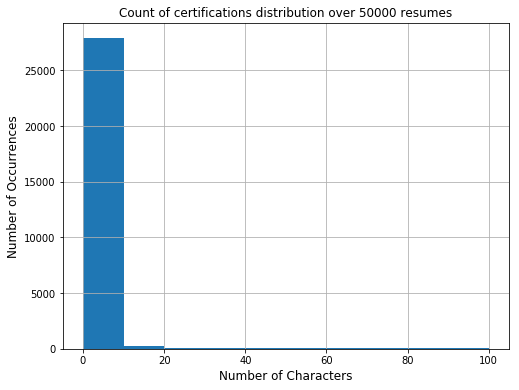

In [5]:
counter_ = data_array['count']

plt.figure(figsize=(8,6))
plt.title("Count of certifications distribution over 50000 resumes")
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Number of Characters', fontsize = 12)
plt.grid(True)

counts, bins, bars = plt.hist(counter_, bins=[0, 10, 20, 30, 40, 50, 100])

print('Comment Average Char Length: ' + str(round(counter_.mean(), 1)))
print('Comment Median Char Length: ' + str(round(counter_.median(), 1)))
print('Comment Variance Char Length: ' + str(round(counter_.std(), 1)))
print('Comment Min Char Length: ' + str(round(counter_.min(), 1)))
print('Comment Max Char Length: ' + str(round(counter_.max(), 1)))


#### Top Certifications

In [80]:
data_array.sort_values(by=['count'], ascending=False)[:50]
data_array.to_json(path_or_buf='certifications.json')

In [81]:
certs = data_array.sort_values(by=['count'], ascending=False)
certs = certs.reset_index(drop=True)
count = 0


certs_one = {}
certs_cleaned = []

import re
from nltk.util import ngrams

def generate_ngrams(s, n):
    s = s.lower()
#     s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, n))
    return output

def clean_cert(cert_raw):
    raw_certs = []
    if (get_abbrev(cert_raw) is not None):
        cert_raw = cert_raw[0:cert_raw.find('(')]
        
    if (cert_raw.find('/') >= 0):
        raw_certs.append(cert_raw[0:cert_raw.find('/')].strip())
        raw_certs.append(cert_raw[cert_raw.find('/')+1:].strip())
    if (cert_raw.find(',') >= 0):
        raw_certs.append(cert_raw[0:cert_raw.find(',')].strip())
        raw_certs.append(cert_raw[cert_raw.find(',')+1:].strip())
    elif (cert_raw.find('&') >= 0):
        raw_certs.append(cert_raw[0:cert_raw.find('&')].strip())
        raw_certs.append(cert_raw[cert_raw.find('&')+1:].strip())
    else:
        raw_certs.append(cert_raw.strip())
    return raw_certs

def get_abbrev(cert_raw):
    unit = {}
    if ((cert_raw.find('(') >= 0) and (cert_raw.find(')') >= 0)):
        paran = cert_raw[cert_raw.find('(') + 1:].strip()
        paran = paran[:paran.find(')')].strip()
        if (paran.isupper()):
            base_skill = cert_raw[0:cert_raw.find('(')].strip()
            words = base_skill.split()
            letters = [word[0] for word in words]
            paran_po = "".join(letters)
            if paran_po.upper() == paran:
                unit[base_skill] = paran
                return unit
    return None

# first pass, break up skills
#   e.g. use /, &, 
#     if independent skill in list, skip
#     if not in list, add
# if in order of alpha-numeric (XYZ), check things before () -> add abbre in column
# for each skill, add type certification and abbre if it exists
for index, count_value in enumerate(certs['cert']):
    if ((certs['count'][index] > 5) and ((certs['count'][index] > 30) or (certs['cert'][index].lower().find('certifi') >= 0) or (certs['cert'][index].lower().find('series') >= 0))):
        count += 1
#         print(certs['cert'][index] + ", " + str(certs['count'][index]))
        cleaned_skill = clean_cert(certs['cert'][index])
        for skill in cleaned_skill:
            if (skill.find('/') < 0) and (skill.lower() not in certs_one) and (len(skill) > 2) and (skill.lower() != "none"):
                certs_one[skill.lower()] = {'cv_count': certs['count'][index], 'skill_abbreviation': '', 'skill': skill, 'approved': 'yes', 'function2': 'indeed', 'skill_type':'certification'}

for index, count_value in enumerate(certs['cert']):
    abbrev = get_abbrev(certs['cert'][index])
    if abbrev is not None:
        for skill in abbrev:
            if (skill.lower() in certs_one):
                certs_one[skill.lower()]['skill_abbreviation'] = abbrev[skill]
            
        
print(len(certs_one))

# if cert is three or more words, find if a substring token is twice as high on the frequency list
# if it is, remove this compound skill


# X Certified
# Certified X
# X Certification
for skill in list(certs_one):
    if (certs_one[skill]['skill'].count(' ') >= 2):
        remove = False #del d[key]
        priority = certs_one[skill]['cv_count']
        priority_sub = 0
        for index in range(1, 4):
            _grams = generate_ngrams(certs_one[skill]['skill'], index)
            for gram in _grams:
                untup_gram = ' '.join(gram).lower().strip()
                if (untup_gram in certs_one):
                    if (priority_sub < certs_one[untup_gram]['cv_count']):
                        priority_sub = certs_one[untup_gram]['cv_count']
                        remove = True
        
        if remove and priority_sub > (priority * 1.5):
            del certs_one[skill]
              
print(len(certs_one))

for skill in list(certs_one):
    if (certs_one[skill]['skill'].count(' ') >= 1):
        remove = False #del d[key]
        priority = certs_one[skill]['cv_count']
        priority_sub = 0
        for index in range(1, 4):
            _grams = generate_ngrams(certs_one[skill]['skill'], index)
            for gram in _grams:
                untup_gram = ' '.join(gram).lower().strip()
                if (untup_gram in certs_one):
                    if (priority_sub < certs_one[untup_gram]['cv_count']):
                        priority_sub = certs_one[untup_gram]['cv_count']
                        remove = True
        
        if remove and priority_sub > (priority * 1.5):
            del certs_one[skill]

for skill in list(certs_one):
    certs_one[skill]['cv_count'] = certs_one[skill]['cv_count'] * 10
    
print(len(certs_one))
print(certs_one)


322
259
231
{'cpr': {'cv_count': 20910, 'skill_abbreviation': '', 'skill': 'CPR', 'approved': 'yes', 'function2': 'indeed', 'skill_type': 'certification'}, 'aed': {'cv_count': 10420, 'skill_abbreviation': '', 'skill': 'AED', 'approved': 'yes', 'function2': 'indeed', 'skill_type': 'certification'}, 'cna': {'cv_count': 8890, 'skill_abbreviation': '', 'skill': 'CNA', 'approved': 'yes', 'function2': 'indeed', 'skill_type': 'certification'}, 'first aid': {'cv_count': 8870, 'skill_abbreviation': '', 'skill': 'First Aid', 'approved': 'yes', 'function2': 'indeed', 'skill_type': 'certification'}, 'forklift certified': {'cv_count': 6730, 'skill_abbreviation': '', 'skill': 'Forklift Certified', 'approved': 'yes', 'function2': 'indeed', 'skill_type': 'certification'}, "driver's license": {'cv_count': 5340, 'skill_abbreviation': '', 'skill': "Driver's License", 'approved': 'yes', 'function2': 'indeed', 'skill_type': 'certification'}, 'bls for healthcare providers': {'cv_count': 4320, 'skill_abbrevi

In [82]:
df = pd.DataFrame(certs_one)
df.to_json(path_or_buf='out_certifications.json')


## Universities

In [56]:
with open('universities.json') as json_file:  
    data = json.load(json_file)

data_array_universities = []
data_array_degrees = {}
data_array_degrees_only = {}

for key, value in data.items():
    unit = {}
    unit['university'] = key
    unit['count'] = len(value)
    data_array_universities.append(unit)
    for degree in value:
        if (degree not in data_array_degrees_only):
            data_array_degrees_only[degree] = 0
        data_array_degrees_only[degree] += 1
        uni_degree_key = degree + key
        if (uni_degree_key not in data_array_degrees):
            unitdegree = {}
            unitdegree['degree'] = degree
            unitdegree['university'] = key
            unitdegree['count'] = 1
            data_array_degrees[uni_degree_key] = unitdegree
        else:
            data_array_degrees[uni_degree_key]['count'] += 1

   


In [57]:
data_array_universities = pd.DataFrame(data = data_array_universities)
data_array_universities.describe()

,count
count,79166.000000
mean,3.126431
std,16.770302
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2446.000000


#### Top Universities

In [27]:
data_array_universities.sort_values(by=['count'], ascending=False)[:25]

,count,university
107,2446,University of Phoenix
244,921,California State University
250,789,University of California
273,648,University of Wisconsin
110,632,ITT Technical Institute
1379,561,Ashford University
420,557,Kaplan University
11,447,Ivy Tech Community College
463,445,DeVry University
54,444,Strayer University


#### Universities Distributions

Comment Average Char Length: 2.3
Comment Median Char Length: 1.0
Comment Variance Char Length: 20.1
Comment Min Char Length: 1
Comment Max Char Length: 2091


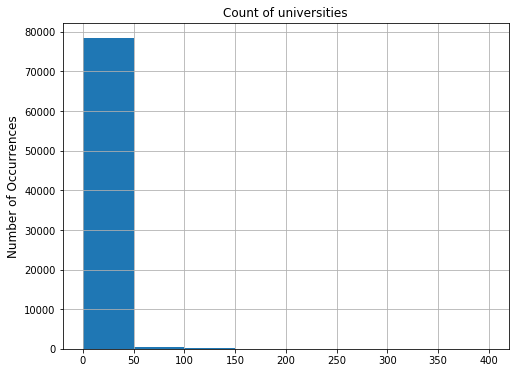

In [99]:
counter_ = data_array_universities['count']

plt.figure(figsize=(8,6))
plt.title("Count of universities")
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.grid(True)

counts, bins, bars = plt.hist(counter_, bins=[0, 50, 100, 150, 200, 250, 400])

print('Comment Average Char Length: ' + str(round(comment_length.mean(), 1)))
print('Comment Median Char Length: ' + str(round(comment_length.median(), 1)))
print('Comment Variance Char Length: ' + str(round(comment_length.std(), 1)))
print('Comment Min Char Length: ' + str(round(comment_length.min(), 1)))
print('Comment Max Char Length: ' + str(round(comment_length.max(), 1)))


#### Top Degrees

In [59]:
data_array_degrees_only_norm = []
for key in data_array_degrees_only:
    data_array_degrees_only_norm.append({'degree':key, 'count':data_array_degrees_only[key]})

data_array_degrees_only_norm = pd.DataFrame(data = data_array_degrees_only_norm)

In [62]:
data_array_degrees_only_norm.sort_values(by=['count'], ascending=False)[:50]


,count,degree
72,2562,High School Diploma
2549,2483,Diploma
96,2327,GED
6,1786,Certificate
40,1382,Bachelor of Science in Business Administration
491,1343,Associate
139,1326,Business Administration
935,1322,High school or equivalent
525,1259,Nursing
110,1120,General Studies


In [67]:
print('Bachelor of Engineering: ' + str(data_array_degrees_only['Bachelor of Engineering']))
#print('Bachelors of Engineering: ' + str(data_array_degrees_only['Bachelors of Engineering']))
print('Master of Engineering: ' + str(data_array_degrees_only['Master of Engineering']))
print('Masters of Engineering: ' + str(data_array_degrees_only['Masters of Engineering']))

Bachelor of Engineering: 16
Master of Engineering: 4
Masters of Engineering: 1


#### Top Degree vs. Universities

In [53]:
data_array_degrees_norm = []
for value in data_array_degrees:
    data_array_degrees_norm.append(data_array_degrees[value])
    if (data_array_degrees[value]['count'] > 20):
        print(data_array_degrees[value])

data_array_degrees_norm = pd.DataFrame(data = data_array_degrees_norm)


{'degree': 'Diploma in Medical Assistant', 'university': 'Everest College', 'count': 32}
{'degree': 'MBA in Business Administration', 'university': 'University of Phoenix', 'count': 23}
{'degree': 'Criminal Justice', 'university': 'University of Phoenix', 'count': 24}
{'degree': 'Bachelor of Science in Business', 'university': 'University of Phoenix', 'count': 35}
{'degree': 'Business Management', 'university': 'University of Phoenix', 'count': 37}
{'degree': 'Bachelor of Science in Business Administration', 'university': 'University of Phoenix', 'count': 28}
{'degree': 'Bachelor of Science in Business Management', 'university': 'University of Phoenix', 'count': 60}
{'degree': 'MBA', 'university': 'University of Phoenix', 'count': 28}
{'degree': 'Bachelor of Science in Information Technology', 'university': 'University of Phoenix', 'count': 22}
{'degree': 'BS in Business Management', 'university': 'University of Phoenix', 'count': 24}
{'degree': 'Bachelor of Science in Psychology', 'un

In [55]:
data_array_degrees_norm.sort_values(by=['count'], ascending=False)[:25]


,count,degree,university
5799,60,Bachelor of Science in Business Management,University of Phoenix
5765,37,Business Management,University of Phoenix
5763,35,Bachelor of Science in Business,University of Phoenix
23853,34,Bachelor of Science in Technical Management,DeVry University
117459,33,Vocational,Vocational School
4790,32,Diploma in Medical Assistant,Everest College
51494,31,High School Diploma,Continental Academy
66595,30,N/A in N/A,N/A
66596,30,N/A,N/A
5788,28,Bachelor of Science in Business Administration,University of Phoenix


## Companies

In [70]:
with open('companies.json') as json_file:  
    data = json.load(json_file)

data_array_companies = []
data_array_job_titles = {}
data_array_job_titles_only = {}

for key, value in data.items():
    unit = {}
    unit['company'] = key
    unit['count'] = len(value)
    data_array_companies.append(unit)
    for job_title in value:
        if (job_title not in data_array_job_titles_only):
            data_array_job_titles_only[job_title] = 0
        data_array_job_titles_only[job_title] += 1
        uni_degree_key = job_title + key
        if (uni_degree_key not in data_array_job_titles):
            unitdegree = {}
            unitdegree['job_title'] = job_title
            unitdegree['company'] = key
            unitdegree['count'] = 1
            data_array_job_titles[uni_degree_key] = unitdegree
        else:
            data_array_job_titles[uni_degree_key]['count'] += 1

   
data_array_companies = pd.DataFrame(data = data_array_companies)
data_array_companies.describe()

,count
count,585012.000000
mean,1.625291
std,11.325267
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4588.000000


#### Top Companies

In [71]:
data_array_companies.sort_values(by=['count'], ascending=False)[:25]

,company,count
445,Walmart,4588
899,McDonald's,2525
122,Wal-Mart,1742
821,Subway,1451
339,McDonalds,1445
509,Target,1443
502,Self Employed,1437
128,Burger King,1382
380,United States Army,1203
768,Dollar General,1048


#### Top Job Titles vs. Companies

In [89]:
data_array_job_titles_norm = []
for value in data_array_job_titles:
    data_array_job_titles_norm.append(data_array_job_titles[value])
    if (data_array_job_titles[value]['count'] > 100):
        print(data_array_job_titles[value])

data_array_job_titles_norm = pd.DataFrame(data = data_array_job_titles_norm)

{'job_title': 'Sales Associate', 'company': "Macy's", 'count': 245}
{'job_title': 'N/A', 'company': 'N/A', 'count': 132}
{'job_title': 'Cashier', 'company': 'Wal-Mart', 'count': 282}
{'job_title': 'Sales Associate', 'company': 'Wal-Mart', 'count': 137}
{'job_title': 'Crew Member', 'company': 'Burger King', 'count': 166}
{'job_title': 'Cashier', 'company': 'Burger King', 'count': 277}
{'job_title': 'Delivery Driver', 'company': 'Pizza Hut', 'count': 117}
{'job_title': 'Cashier', 'company': 'Taco Bell', 'count': 158}
{'job_title': 'Cashier', 'company': 'Dollar Tree', 'count': 145}
{'job_title': 'Cashier', 'company': "Wendy's", 'count': 148}
{'job_title': 'Crew Member', 'company': "Wendy's", 'count': 139}
{'job_title': 'Cashier', 'company': 'McDonalds', 'count': 265}
{'job_title': 'Crew Member', 'company': 'McDonalds', 'count': 267}
{'job_title': 'Package Handler', 'company': 'UPS', 'count': 126}
{'job_title': 'Cashier', 'company': 'Walmart', 'count': 695}
{'job_title': 'Cashier/Customer 

In [90]:
data_array_job_titles_norm.sort_values(by=['count'], ascending=False)[:25]

,company,count,job_title
12102,Walmart,695,Cashier
23003,McDonald's,479,Crew Member
22070,Subway,353,Sandwich Artist
23004,McDonald's,331,Cashier
12124,Walmart,316,Sales Associate
2920,Wal-Mart,282,Cashier
3721,Burger King,277,Cashier
8514,McDonalds,267,Crew Member
8507,McDonalds,265,Cashier
19277,Starbucks,254,Barista


In [93]:
data_array_job_titles_only_norm = []
for key in data_array_job_titles_only:
    data_array_job_titles_only_norm.append({'job_title':key, 'count':data_array_job_titles_only[key]})

data_array_job_titles_only_norm = pd.DataFrame(data = data_array_job_titles_only_norm)


#### Top Job Titles

In [95]:
data_array_job_titles_only_norm.describe()

,count
count,355315.000000
mean,2.675978
std,49.313700
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14278.000000


In [94]:
data_array_job_titles_only_norm.sort_values(by=['count'], ascending=False)[:25]

,count,job_title
38,14278,Cashier
25,11572,Sales Associate
65,9944,Customer Service Representative
478,5978,Administrative Assistant
564,5501,Assistant Manager
1368,5243,Server
537,4499,Receptionist
195,4237,Manager
93,3723,Cashier/Customer Service
2323,3438,Office Manager


In [98]:
print('Engineer: ' + str(data_array_job_titles_only['Engineer']))
print('Software Engineer: ' + str(data_array_job_titles_only['Software Engineer']))


print('Engineer: ' + str(data_array_job_titles_only['Engineer']))
print('Software Engineer: ' + str(data_array_job_titles_only['Software Engineer']))


Engineer: 203
Software Engineer: 648




### Observations

- Lots of vocational school, nursing and online degrees
- Lots of GED degrees - consider adding this as a check in the educational requirement section as improving the education finding
- Lots of blue/pink collar jobs -> still the majority of jobs in the USA
   - Product Roadmap or Brainstorm sessions here or more data analysis to see if there's segmentation fit

### Next Steps

#### Current Extracted Data

- [Market Segmentation] Explore online degrees, nursing and vocational occupations as a potential market segment in Jobscan
    - Explore this segment in our Jobscan dataset (comparative size)
    - Ensure that this segment's skills and findings are covered and relevant
- [Data Santization/Improvement] Lift algorithm, perhaps based on frequency to extract a list of skills to push/approve in our database
    - List of skills
    - Cross reference top job titles
    - Cross reference top companies


#### Other Extracted Data
- Major and Job Title Correlation
- Ideas?
